<a href="https://colab.research.google.com/github/ramirezzzluisss/IS4487/blob/main/HonorsThesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Honors Thesis Data Analysis
## Utah DOPL Contractor Credit Qualtrics Survey

In [41]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# connect to csv data file

from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/UtahContractorSurvey_202303201102.csv')

Mounted at /content/gdrive


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   StartDate              1358 non-null   object
 1   EndDate                1358 non-null   object
 2   Status                 1358 non-null   object
 3   IPAddress              1350 non-null   object
 4   Progress               1358 non-null   object
 5   Duration (in seconds)  1358 non-null   object
 6   Finished               1358 non-null   object
 7   RecordedDate           1358 non-null   object
 8   ResponseId             1358 non-null   object
 9   RecipientLastName      2 non-null      object
 10  RecipientFirstName     2 non-null      object
 11  RecipientEmail         2 non-null      object
 12  ExternalReference      2 non-null      object
 13  LocationLatitude       1045 non-null   object
 14  LocationLongitude      1045 non-null   object
 15  DistributionChannel  

In [45]:
df.head(15)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q21_8_TEXT,Q22,Q29
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Has your business been approved for a loan thr...,Has your business been approved for a business...,How would you rate your relationship with your...,Is your accountant or tax preparer a Certified...,How much revenue/sales did your business make ...,What is your business's total outstanding busi...,What is the top source of financing for your b...,What is the top source of financing for your b...,Which of the following Utah consulting service...,Enter your phone number if you are interested ...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID14""}","{""ImportId"":""QID15""}","{""ImportId"":""QID16""}","{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID19""}","{""ImportId"":""QID20""}","{""ImportId"":""QID20_8_TEXT""}","{""ImportId"":""QID21""}","{""ImportId"":""QID28_TEXT""}"
2,2023-02-13 15:10:50,2023-02-13 15:12:01,Survey Preview,NaN,100,70,True,2023-02-13 15:12:01,R_1lidpbGA9ypeT2L,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-02-16 21:46:47,2023-02-16 21:50:44,Survey Preview,NaN,100,236,True,2023-02-16 21:50:45,R_1CHhLtsrT1hBKQ4,NaN,...,Approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-02-27 13:45:55,2023-02-27 13:48:28,Survey Preview,NaN,100,152,True,2023-02-27 13:48:29,R_2QYbxOXJxwk7sRc,NaN,...,Did not apply,Did not apply,No Relationship,I DO NOT know,$100k - $250k,$0,Local Bank or Credit Union,NaN,"Small Business Administration,Small Business D...",NaN
5,2023-02-27 14:43:19,2023-02-27 14:43:48,Survey Preview,NaN,100,29,True,2023-02-27 14:43:49,R_RrwxY3MgIlhiidP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-03-03 10:49:34,2023-03-03 10:51:27,Survey Preview,NaN,100,112,True,2023-03-03 10:51:28,R_pSEuN2bwWsxMxyN,NaN,...,Did not apply,Did not apply,No Relationship,No,$100k - $250k,$0,Personal and Family Savings,NaN,"Small Business Administration,Suazo Business C...",NaN
7,2023-03-03 10:51:33,2023-03-03 10:51:47,Survey Preview,NaN,100,13,True,2023-03-03 10:51:49,R_2AXXEMMkIVqtM7g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-03-03 11:00:24,2023-03-03 11:03:34,IP Address,107.3.87.173,100,190,True,2023-03-03 11:03:34,R_3iJeQAfkldNjMcV,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$0,Other,Cash,Small Business Administration,NaN
9,2023-03-03 11:19:32,2023-03-03 11:23:22,IP Address,174.204.5.25,100,229,True,2023-03-03 11:23:22,R_25WUjfR7BFCSpxT,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$25k-$100k,Personal and Family Savings,NaN,"Small Business Administration,Women's Business...",NaN


In [46]:
# clean data
df.rename(columns = {'Q2':'LicenseClassification',
                     'Q3':'EntityType',
                     'Q4':'LatinxShareholders',
                     'Q5':'Age',
                     'Q6':'YearsofExperience',
                     'Q7':'ConstructionFocus',
                     'Q8':'LEED',
                     'Q9':'BusinessPlan',
                     'Q10':'EINApplication',
                     'Q11':'NumOfEmployees',
                     'Q12':'LatinxEmployeesPercent',
                     'Q13':'WorkAccidents',
                     'Q14':'SBALoan',
                     'Q15':'PPPLoan',
                     'Q16':'BankCreditUnionLoan',
                     'Q17':'LoanOfficerRelationship',
                     'Q18':'AccountantCPA',
                     'Q19':'Revenue2022',
                     'Q20':'TotalOutstandingDebt',
                     'Q21':'TopFinancingSource',
                     'Q22':'ConsultingServices',
                     'Q23':'RaceAndEthnicity',
                     'Q24':'Gender',
                     'Q25':'Education',
                     'Q26':'CreditScore',
                     'Q27':'HomeOwner',
                     'Q28':'EnglishLanguage',
                     'Q29':'PhoneNumber',
                     }, inplace = True)

df_clean = df.iloc[8:]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 8 to 1357
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   StartDate                1350 non-null   object
 1   EndDate                  1350 non-null   object
 2   Status                   1350 non-null   object
 3   IPAddress                1348 non-null   object
 4   Progress                 1350 non-null   object
 5   Duration (in seconds)    1350 non-null   object
 6   Finished                 1350 non-null   object
 7   RecordedDate             1350 non-null   object
 8   ResponseId               1350 non-null   object
 9   RecipientLastName        0 non-null      object
 10  RecipientFirstName       0 non-null      object
 11  RecipientEmail           0 non-null      object
 12  ExternalReference        0 non-null      object
 13  LocationLatitude         1037 non-null   object
 14  LocationLongitude        1037 non-null  

In [47]:
df_clean.head(5)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,PPPLoan,BankCreditUnionLoan,LoanOfficerRelationship,AccountantCPA,Revenue2022,TotalOutstandingDebt,TopFinancingSource,Q21_8_TEXT,ConsultingServices,PhoneNumber
8,2023-03-03 11:00:24,2023-03-03 11:03:34,IP Address,107.3.87.173,100,190,True,2023-03-03 11:03:34,R_3iJeQAfkldNjMcV,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$0,Other,Cash,Small Business Administration,NaN
9,2023-03-03 11:19:32,2023-03-03 11:23:22,IP Address,174.204.5.25,100,229,True,2023-03-03 11:23:22,R_25WUjfR7BFCSpxT,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$25k-$100k,Personal and Family Savings,NaN,"Small Business Administration,Women's Business...",NaN
10,2023-03-03 11:20:13,2023-03-03 11:24:58,IP Address,73.127.32.5,100,284,True,2023-03-03 11:24:58,R_3nT79TKTyBgzdQf,NaN,...,Did not apply,Did not apply,Excellent,Yes,$250k - $1M,$0,Personal and Family Savings,NaN,"Small Business Administration,Small Business D...",NaN
11,2023-03-03 11:24:01,2023-03-03 11:27:40,IP Address,74.68.107.21,100,219,True,2023-03-03 11:27:41,R_3oMkMuBaB0VM7og,NaN,...,Approved,Did not apply,Excellent,No,More than $1M,$100k-$250k,Personal and Family Savings,NaN,Small Business Administration,NaN
12,2023-03-03 11:29:05,2023-03-03 11:31:45,IP Address,73.65.139.97,100,159,True,2023-03-03 11:31:45,R_1gA5HrPFMm9DM6N,NaN,...,Did not apply,Approved,Excellent,Yes,More than $1M,$25k-$100k,Business Credit Card,NaN,Small Business Administration,8018791018


Text(0.5, 1.0, 'Revenue and Race')

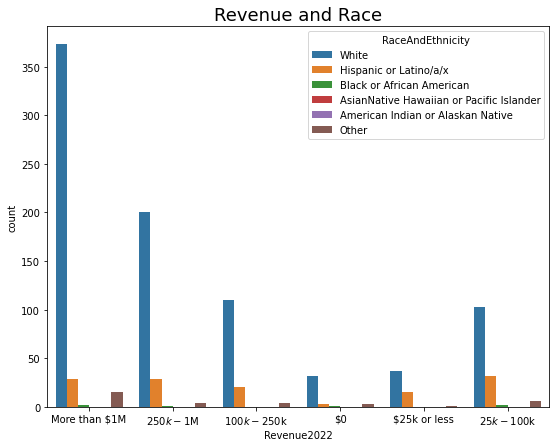

In [48]:
plt.figure(figsize=(9,7))
hue_order = ['White', 'Hispanic or Latino/a/x', 'Black or African American', 'Asian'
             'Native Hawaiian or Pacific Islander', 'American Indian or Alaskan Native',
             'Other']

ax = sns.countplot(x = 'Revenue2022', hue = 'RaceAndEthnicity', hue_order = hue_order, data = df_clean)
#Add title
plt.title('Revenue and Race', fontsize=18)

Text(0.5, 1.0, 'Bank/Credit Union Loan and Race')

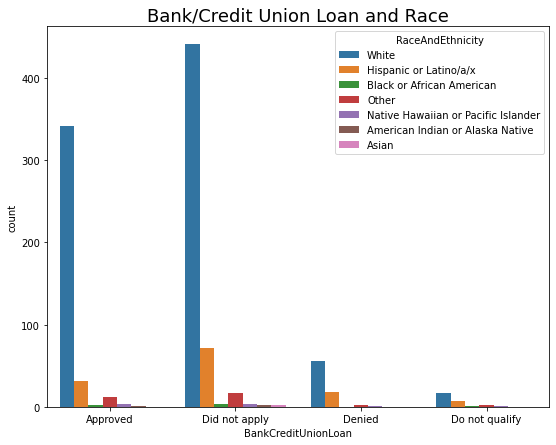

In [50]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'BankCreditUnionLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('Bank/Credit Union Loan and Race', fontsize=18)

Text(0.5, 1.0, 'SBA Loan and Race')

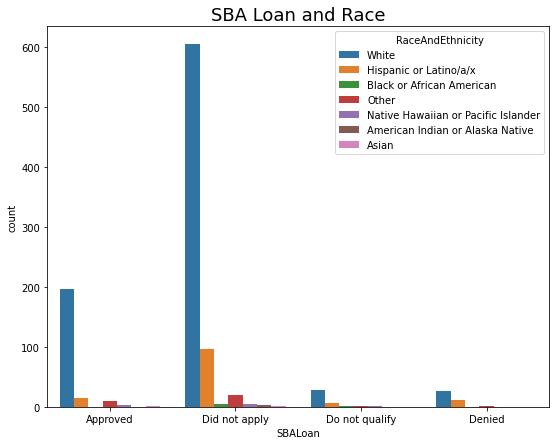

In [53]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'SBALoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('SBA Loan and Race', fontsize=18)

Text(0.5, 1.0, 'PPP Loan and Race')

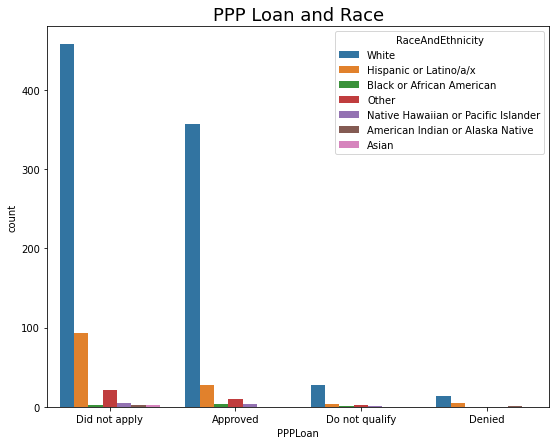

In [52]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'PPPLoan', hue = 'RaceAndEthnicity', data = df_clean)
#Add title
plt.title('PPP Loan and Race', fontsize=18)

Text(0.5, 1.0, 'Education and Race')

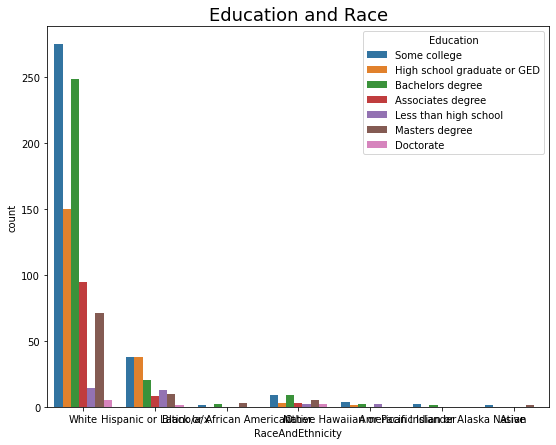

In [55]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'Education', data = df_clean)
#Add title
plt.title('Education and Race', fontsize=18)

Text(0.5, 1.0, 'Entity Type and Race')

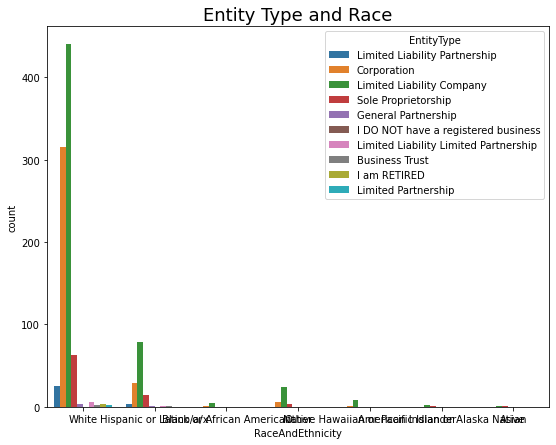

In [67]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'EntityType', data = df_clean)
#Add title
plt.title('Entity Type and Race', fontsize=18)

Text(0.5, 1.0, 'Business Plan and Race')

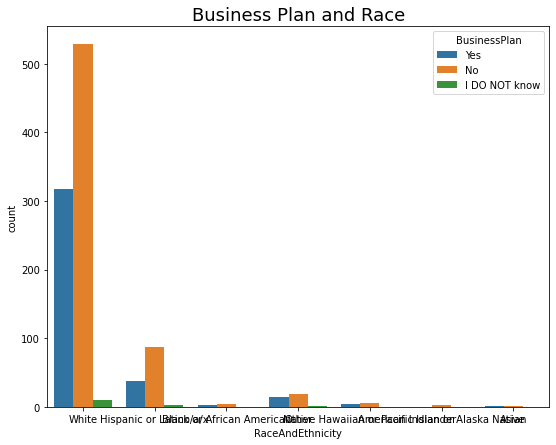

In [64]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'BusinessPlan', data = df_clean)
#Add title
plt.title('Business Plan and Race', fontsize=18)

Text(0.5, 1.0, 'LEED and Race')

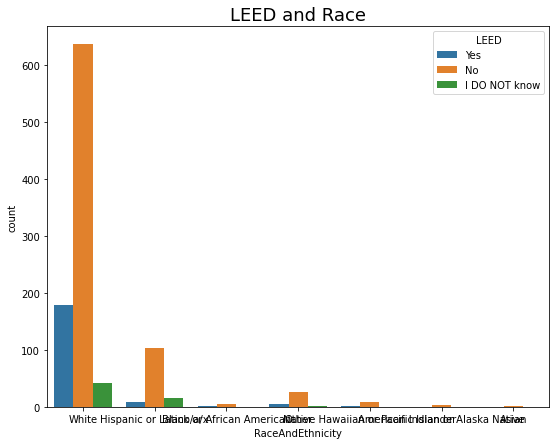

In [65]:
plt.figure(figsize=(9,7))

ax = sns.countplot(x = 'RaceAndEthnicity', hue = 'LEED', data = df_clean)
#Add title
plt.title('LEED and Race', fontsize=18)